# What is Differential Privacy? A Visual Explanation

Imagine you have a dataset of people's locations on a map. You want to share this data for research, but you also want to **protect each person's privacy**. You don't want anyone to figure out exactly where a specific person is.

This is the core problem **Differential Privacy (DP)** solves.

The idea is simple: instead of sharing exact locations, we **add random noise** to some of the points. That way, if someone looks at the data, they can't be sure whether a point is a person's real location or a slightly shifted version of it.

Let's see how this works step by step.

## Step 1: The Original Data

We start with a simple setup: a **1×1 square** representing our map. We randomly place **100 people** (points) inside this square. These are their **true locations** — the data we want to protect.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# --- Parameters (easy to adjust) ---
n = 100       # number of points
p = 0.5       # privacy threshold (0 to 1)
sigma = 0.1   # how much noise to add

# Generate random points in the unit square
np.random.seed(42)
original = np.random.uniform(0, 1, size=(n, 2))

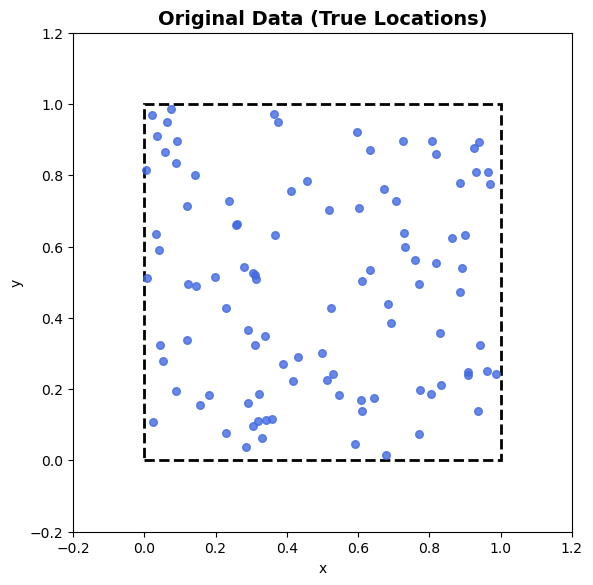

In [2]:
# Plot 1: Original points
fig, ax = plt.subplots(figsize=(6, 6))
ax.add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', linestyle='--'))
ax.scatter(original[:, 0], original[:, 1], c='royalblue', s=30, alpha=0.8)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect('equal')
ax.set_title('Original Data (True Locations)', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Step 2: The Privacy Mechanism

Now here's where differential privacy comes in. For **each point**, we need to decide: should we report the **true location** or a **noisy (shifted) version**?

### How do we decide?

Think of a number line from **0 to 1**. We pick a threshold value **p** (our privacy parameter). For each point, we generate a random number **r** between 0 and 1:

```
0 -------|------- 1
  TRUE   p   NOISY
```

- If **r < p** → we report the **true** location
- If **r ≥ p** → we add **random noise** and report the shifted version

The noise comes from a **Gaussian (normal) distribution** — most shifts are small, but occasionally a point gets moved further away.

### Why does this protect privacy?

Because an observer looking at the final data **cannot tell** whether any given point is real or noisy. Every person has **plausible deniability** — they can always say their reported location isn't their real one.

In [3]:
# Apply the differential privacy mechanism
reported = original.copy()

# For each point, generate a random number r on [0, 1]
r = np.random.uniform(0, 1, size=n)

# If r >= p, add Gaussian noise
noisy_mask = r >= p
n_noisy = noisy_mask.sum()
n_true = n - n_noisy

noise = np.random.normal(0, sigma, size=(n_noisy, 2))
reported[noisy_mask] += noise

print(f"Out of {n} points:")
print(f"  {n_true} reported their TRUE location (r < {p})")
print(f"  {n_noisy} reported a NOISY location  (r >= {p})")

Out of 100 points:
  42 reported their TRUE location (r < 0.5)
  58 reported a NOISY location  (r >= 0.5)


## Step 3: The Data After Differential Privacy

Now let's look at what the data looks like **after** applying DP. These are the **reported locations** — the data that would actually be shared publicly.

Notice how some points have drifted outside the original square. That's the noise doing its job — making it harder to pin down exact locations.

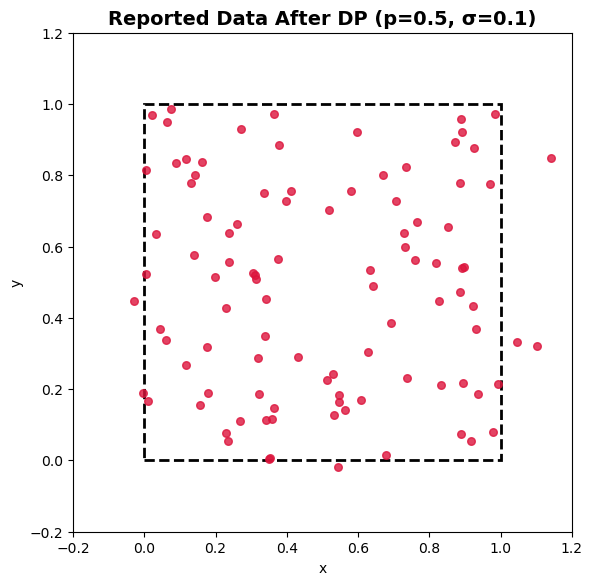

In [4]:
# Plot 2: Reported (noisy) points
fig, ax = plt.subplots(figsize=(6, 6))
ax.add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', linestyle='--'))
ax.scatter(reported[:, 0], reported[:, 1], c='crimson', s=30, alpha=0.8)
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_aspect('equal')
ax.set_title(f'Reported Data After DP (p={p}, \u03c3={sigma})', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Step 4: Seeing the Spread

Now let's overlay both datasets to see the **geometric effect** of differential privacy.

- **Blue dots** = true locations
- **Red dots** = reported locations after DP
- **Grey lines** = how far each point was shifted

Points reported truthfully have the blue and red dots stacked together with no visible line. Points that got noise show a visible shift — that's the "spread" that DP creates.

This is the **geometric intuition**: noise spreads the points outward from their true positions, creating uncertainty about where anyone really is.

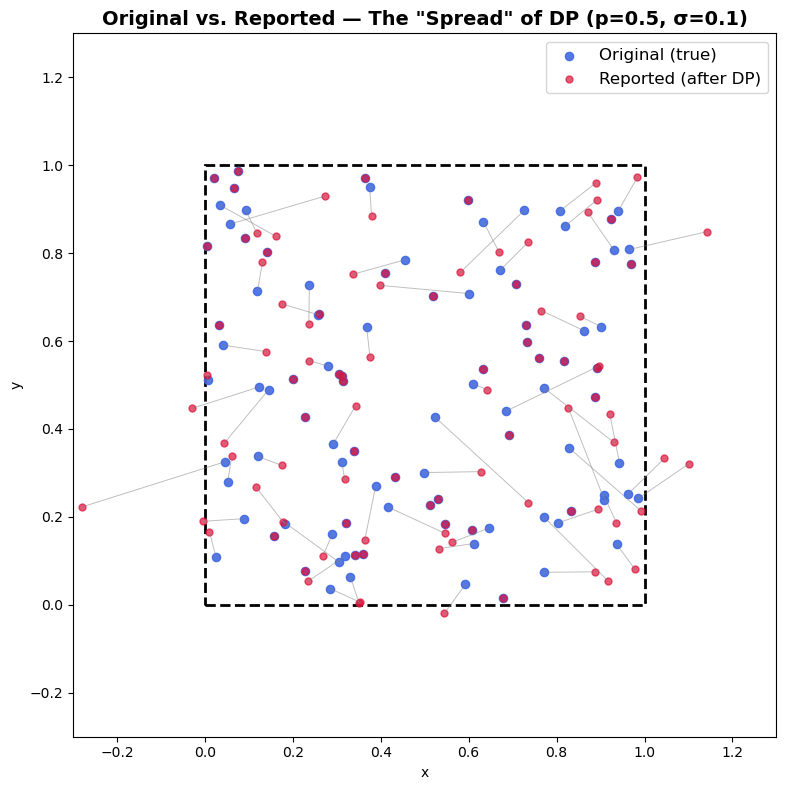

In [5]:
# Plot 3: Overlay — see the spread
fig, ax = plt.subplots(figsize=(8, 8))
ax.add_patch(patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', linestyle='--'))

# Lines connecting original to reported
for i in range(n):
    ax.plot([original[i, 0], reported[i, 0]],
            [original[i, 1], reported[i, 1]],
            color='grey', linewidth=0.7, alpha=0.5)

ax.scatter(original[:, 0], original[:, 1], c='royalblue', s=35, alpha=0.9, label='Original (true)')
ax.scatter(reported[:, 0], reported[:, 1], c='crimson', s=25, alpha=0.7, label='Reported (after DP)')

ax.set_xlim(-0.3, 1.3)
ax.set_ylim(-0.3, 1.3)
ax.set_aspect('equal')
ax.legend(fontsize=12, loc='upper right')
ax.set_title(f'Original vs. Reported — The "Spread" of DP (p={p}, \u03c3={sigma})', fontsize=14, fontweight='bold')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.show()

## Key Takeaway

Differential privacy introduces **controlled randomness** into data. The two knobs are:

- **p** (threshold) — controls *how many* points get noise. Higher p = more true reports = better data but weaker privacy.
- **sigma** — controls *how much* noise is added. Higher sigma = bigger shifts = stronger privacy but more distortion.

The key insight is that **no one can tell which points are real and which are noisy**, giving every individual plausible deniability about their true location.